<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#SpecD" data-toc-modified-id="SpecD-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>SpecD</a></span><ul class="toc-item"><li><span><a href="#General-diet" data-toc-modified-id="General-diet-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>General diet</a></span></li></ul></li><li><span><a href="#IndD-sensitivity" data-toc-modified-id="IndD-sensitivity-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>IndD sensitivity</a></span><ul class="toc-item"><li><span><a href="#Host-tree-subsample" data-toc-modified-id="Host-tree-subsample-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Host tree subsample</a></span></li><li><span><a href="#PGLS" data-toc-modified-id="PGLS-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>PGLS</a></span><ul class="toc-item"><li><span><a href="#Diet" data-toc-modified-id="Diet-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Diet</a></span><ul class="toc-item"><li><span><a href="#Saving-results" data-toc-modified-id="Saving-results-6.2.1.1"><span class="toc-item-num">6.2.1.1&nbsp;&nbsp;</span>Saving results</a></span></li><li><span><a href="#p-adjust" data-toc-modified-id="p-adjust-6.2.1.2"><span class="toc-item-num">6.2.1.2&nbsp;&nbsp;</span>p-adjust</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-6.2.1.3"><span class="toc-item-num">6.2.1.3&nbsp;&nbsp;</span>Plotting</a></span></li><li><span><a href="#Significant-indices" data-toc-modified-id="Significant-indices-6.2.1.4"><span class="toc-item-num">6.2.1.4&nbsp;&nbsp;</span>Significant indices</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-6.2.1.5"><span class="toc-item-num">6.2.1.5&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li><li><span><a href="#Diet-compenents" data-toc-modified-id="Diet-compenents-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Diet compenents</a></span><ul class="toc-item"><li><span><a href="#p-adjust" data-toc-modified-id="p-adjust-6.2.2.1"><span class="toc-item-num">6.2.2.1&nbsp;&nbsp;</span>p-adjust</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-6.2.2.2"><span class="toc-item-num">6.2.2.2&nbsp;&nbsp;</span>Plotting</a></span></li><li><span><a href="#Significant-indices" data-toc-modified-id="Significant-indices-6.2.2.3"><span class="toc-item-num">6.2.2.3&nbsp;&nbsp;</span>Significant indices</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* PGLS on alpha-diversity values to determine correlations with diet when accounting for phylogeny

# Var

In [59]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT/PGLS/'

# phyloseq
physeq_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/physeq_r5k.RDS'

# alpha-div calculated with qiime2
alpha_div_file = "/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/diversity//alpha_div.RDS"

# host SpecD tree
host_tree_SpecD_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20180625_rn_16S-r5k_SpecD.nwk'

# host IndD tree
host_tree_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20180625_rn_16S-r5k_IndD.nwk'

# params
threads = 12

# Init

In [60]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(ape)
library(phyloseq)
library(ade4)
library(ape)
library(caper)
source('/ebio/abt3_projects/Georg_animal_feces/code/init.R') 

In [61]:
make_dir(work_dir)
setwd(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT/PGLS/ 


 # Load

In [4]:
# phyloseq
physeq = readRDS(physeq_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 30290 taxa and 213 samples ]
sample_data() Sample Data:       [ 213 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 30290 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 30290 tips and 29752 internal nodes ]

In [6]:
# metadata table
metadata = physeq %>%
    sample_data %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(X.SampleID = rownames(.)) %>%
    dplyr::select(X.SampleID, scientific_name, diet, 
                  diet_vertebrate,diet_invertebrate,diet_fruit,
                  diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,
                  diet_seeds,diet_grass_waterplants,diet_roots_tubers) %>%
    mutate(scientific_name = gsub(' ', '_', scientific_name)) %>%
    as.data.frame

rownames(metadata) = metadata$SampleID
metadata %>% dfhead

Warning message in class(X) <- NULL:
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 213  11


X.SampleID,scientific_name,diet,diet_vertebrate,diet_invertebrate,diet_fruit,diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,diet_seeds,diet_grass_waterplants,diet_roots_tubers
X1.Eurasian.Beaver,Castor_fiber,herbivore,no,no,no,no,yes,no,yes,yes
X101.Horse,Equus_caballus,herbivore,no,no,no,no,no,yes,yes,no
X102.Kulan,Equus_hemionus,herbivore,no,no,no,no,yes,no,yes,no


In [7]:
# host tree file (1 per species)
host_tree = read.tree(host_tree_SpecD_file)
host_tree


Phylogenetic tree with 128 tips and 127 internal nodes.

Tip labels:
	Sander_lucioperca, Esox_lucius, Salvelinus_fontinalis, Aspius_aspius, Leuciscus_idus, Blicca_bjoerkna, ...
Node labels:
	Node1, Node2, Node3, Node4, Node5, Node6, ...

Rooted; includes branch lengths.

In [8]:
# load alpha-div values
alpha_div = readRDS(alpha_div_file)
alpha_div = do.call(cbind, alpha_div)
alpha_div$X.SampleID = rownames(alpha_div) 

alpha_div %>% dfhead

[1] 213   5


,pielou_e,observed_otus,shannon,faith_pd,X.SampleID
X1.Eurasian.Beaver,0.6507254,158,4.752756,16.56554,X1.Eurasian.Beaver
X101.Horse,0.9042161,933,8.920754,59.46621,X101.Horse
X102.Kulan,0.8443325,422,7.363508,35.80528,X102.Kulan


# SpecD

## General diet

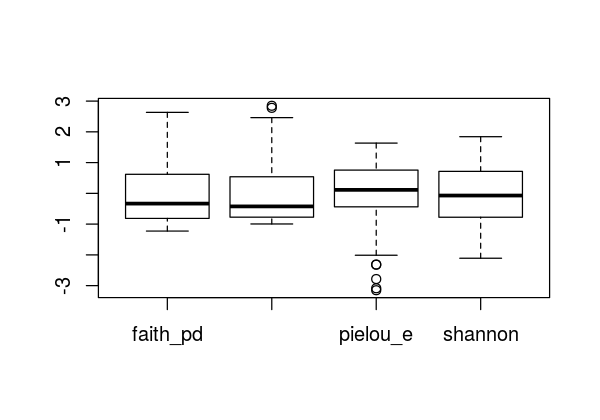

In [9]:
# summarizing alpha diversity
alpha_div_s = alpha_div %>%
    gather(index, index_value, -X.SampleID) %>%
    inner_join(metadata %>% dplyr::select(X.SampleID, scientific_name), 
               c('X.SampleID')) %>%
    group_by(scientific_name, index) %>%
    summarize(index_value = mean(index_value)) %>%
    ungroup() %>%
    spread(index, index_value) %>%
    as.data.frame


rownames(alpha_div_s) = alpha_div_s$scientific_name
alpha_div_s$scientific_name = NULL

# center + scale
alpha_div_s = scale(alpha_div_s) %>% as.data.frame

# status
options(repr.plot.height=3.5, repr.plot.width=5)
boxplot(alpha_div_s)

In [10]:
# formatting diet
majority_rules = function(x){
    y = table(x) %>% sort(decreasing=TRUE)
    z = NA
    if(y[1] > y[2]){
        z = names(y)[1]
    } else {
        z = y[y == y[1]]
        z = base::sample(z, 1)
    }
    return(z)
}

diet = metadata %>%
    mutate(diet = ifelse(diet == 'herbivore', 1,
                        ifelse(diet == 'omnivore', 0.5, 0))) %>%
    group_by(scientific_name) %>%
    summarize(diet = mean(diet)) %>%
    ungroup() %>%
    as.data.frame

rownames(diet) = diet$scientific_name
diet$scientific_name = NULL

diet %>% dfhead

[1] 128   1


,diet
Acrocephalus_scirpaceus,0.5
Aepyceros_melampus,1.0
Anas_platyrhynchos,0.5


In [11]:
# combine alpha_div & diet
alpha_div_s = cbind(alpha_div_s, diet[rownames(alpha_div_s),])
colnames(alpha_div_s)[ncol(alpha_div_s)] = 'diet'
alpha_div_s$taxa = rownames(alpha_div_s)

alpha_div_s %>% dfhead

[1] 128   6


,faith_pd,observed_otus,pielou_e,shannon,diet,taxa
Acrocephalus_scirpaceus,-0.5849527,-0.6358356,-0.36400864,-0.4780466,0.5,Acrocephalus_scirpaceus
Aepyceros_melampus,0.8717978,1.0924104,-0.04600453,0.4806973,1.0,Aepyceros_melampus
Anas_platyrhynchos,-0.5194136,-0.5733689,-0.48567280,-0.4774631,0.5,Anas_platyrhynchos


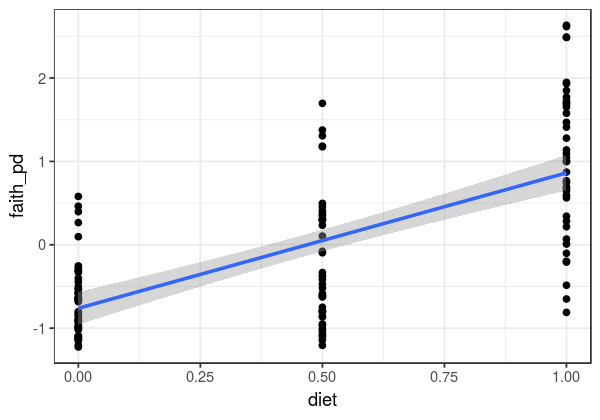

In [12]:
# plotting association
p = ggplot(alpha_div_s, aes(diet, faith_pd)) +
    geom_point() +
    geom_smooth(method='lm') +
    theme_bw()

plot(p)

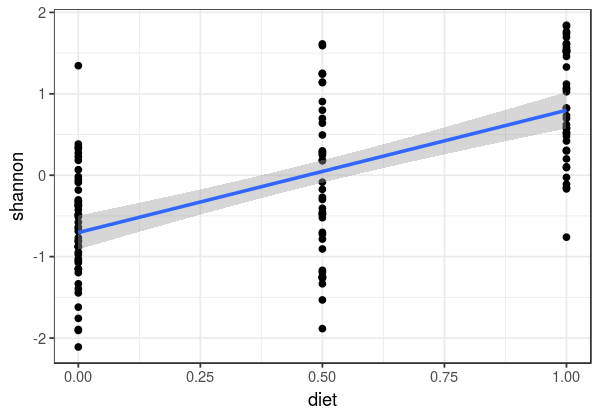

In [13]:
# plotting association
p = ggplot(alpha_div_s, aes(diet, shannon)) +
    geom_point() +
    geom_smooth(method='lm') +
    theme_bw()

plot(p)

In [14]:
# linear regression
lm(faith_pd ~ diet, data=alpha_div_s) %>% summary


Call:
lm(formula = faith_pd ~ diet, data = alpha_div_s)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67387 -0.46500 -0.06539  0.40834  1.77071 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.76113    0.09912  -7.679 3.88e-12 ***
diet         1.62375    0.15859  10.238  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7418 on 126 degrees of freedom
Multiple R-squared:  0.4541,	Adjusted R-squared:  0.4498 
F-statistic: 104.8 on 1 and 126 DF,  p-value: < 2.2e-16


In [15]:
# linear regression
lm(faith_pd ~ shannon, data=alpha_div_s) %>% summary


Call:
lm(formula = faith_pd ~ shannon, data = alpha_div_s)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71268 -0.31616 -0.07865  0.28306  1.18730 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.779e-17  3.898e-02    0.00        1    
shannon      8.984e-01  3.913e-02   22.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.441 on 126 degrees of freedom
Multiple R-squared:  0.8071,	Adjusted R-squared:  0.8055 
F-statistic: 527.1 on 1 and 126 DF,  p-value: < 2.2e-16


In [16]:
# convert to caper object
cdat = comparative.data(data=alpha_div_s, phy=host_tree, names.col="taxa")

In [17]:
# pgls
pgls(faith_pd ~ diet, data=cdat, lambda=0.5) %>% summary


Call:
pgls(formula = faith_pd ~ diet, data = cdat, lambda = 0.5)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102526 -0.026604  0.000761  0.021613  0.135322 

Branch length transformations:

kappa  [Fix]  : 1.000
lambda [Fix]  : 0.500
delta  [Fix]  : 1.000

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -0.60219    0.30975 -1.9442   0.05411 .  
diet         1.39427    0.18149  7.6825 3.807e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0413 on 126 degrees of freedom
Multiple R-squared: 0.319,	Adjusted R-squared: 0.3136 
F-statistic: 59.02 on 1 and 126 DF,  p-value: 3.807e-12 

In [18]:
# pgls
pgls(shannon ~ diet, data=cdat, lambda=0.5) %>% summary


Call:
pgls(formula = shannon ~ diet, data = cdat, lambda = 0.5)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102675 -0.025473 -0.001355  0.037282  0.112826 

Branch length transformations:

kappa  [Fix]  : 1.000
lambda [Fix]  : 0.500
delta  [Fix]  : 1.000

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -0.58992    0.33638 -1.7537   0.08191 .  
diet         1.24766    0.19709  6.3303 3.927e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04485 on 126 degrees of freedom
Multiple R-squared: 0.2413,	Adjusted R-squared: 0.2353 
F-statistic: 40.07 on 1 and 126 DF,  p-value: 3.927e-09 

# IndD sensitivity

* Subsamplings of 1 sample per species

In [19]:
to_binary = function(x){
    x = gsub(' .+', '', x)
    stopifnot(x %in% c('yes', 'no'))
    ifelse(x=='yes', 1, 0)
}

In [20]:
# alpha diversity
tmp = metadata %>% 
    dplyr::select(X.SampleID, scientific_name, diet,
                 diet_vertebrate,diet_invertebrate,diet_fruit,
                  diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,
                  diet_seeds,diet_grass_waterplants,diet_roots_tubers)

alpha_div_j = alpha_div %>%
    inner_join(tmp, c('X.SampleID')) %>%
    mutate(taxa = X.SampleID,
           diet_vertebrate = to_binary(diet_vertebrate),
           diet_invertebrate = to_binary(diet_invertebrate),
           diet_fruit = to_binary(diet_fruit),
           diet_flowers_nectar_pollen = to_binary(diet_flowers_nectar_pollen),
           diet_leaves_branches_bark_buds = to_binary(diet_leaves_branches_bark_buds),
           diet_seeds = to_binary(diet_seeds),
           diet_grass_waterplants = to_binary(diet_grass_waterplants),
          diet_roots_tubers = to_binary(diet_roots_tubers)) %>%
    as.data.frame

rownames(alpha_div_j) = alpha_div_j$X.SampleID

alpha_div_j %>% dfhead

[1] 213  16


,pielou_e,observed_otus,shannon,faith_pd,X.SampleID,scientific_name,diet,diet_vertebrate,diet_invertebrate,diet_fruit,diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,diet_seeds,diet_grass_waterplants,diet_roots_tubers,taxa
X1.Eurasian.Beaver,0.6507254,158,4.752756,16.56554,X1.Eurasian.Beaver,Castor_fiber,herbivore,0,0,0,0,1,0,1,1,X1.Eurasian.Beaver
X101.Horse,0.9042161,933,8.920754,59.46621,X101.Horse,Equus_caballus,herbivore,0,0,0,0,0,1,1,0,X101.Horse
X102.Kulan,0.8443325,422,7.363508,35.80528,X102.Kulan,Equus_hemionus,herbivore,0,0,0,0,1,0,1,0,X102.Kulan


## Host tree subsample

In [21]:
host_tree = read.tree(host_tree_IndD_file)
host_tree


Phylogenetic tree with 213 tips and 177 internal nodes.

Tip labels:
	X256.Zander, F302.Northern.Pike, X188.Brook.Trout, F300.Asp, X330.Ide, X327.Silver.Bream, ...
Node labels:
	Node1, Node2, Node3, Node4, Node5, Node6, ...

Rooted; includes branch lengths.

In [22]:
#' randomly selecting one per group
tree_subsample = function(L, df, tree){
    # get subsample (note: subsampling within each species)
    to_keep = df %>% 
        group_by(scientific_name) %>% 
        sample_n(1) %>%
        .$sample
    # subsampling tree
    to_rm = setdiff(tree$tip.label, to_keep)
    tree = drop.tip(tree, to_rm)
    return(tree)
}

In [23]:
# permuted trees
df = metadata %>%
    mutate(sample = X.SampleID) %>%
    dplyr::select(sample, scientific_name) 

doParallel::registerDoParallel(threads)
host_tree_l = plyr::llply(as.list(1:100), 
                          function(x) tree_subsample(x, df, host_tree),
                          .parallel=TRUE)
host_tree_l %>% length

[1] 100

In [24]:
# check tips per tree
lapply(host_tree_l, function(x) x$tip.label %>% length) %>% unlist %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    128     128     128     128     128     128 

In [25]:
# check overlap
setdiff(host_tree$tip.label, rownames(alpha_div_j)) %>% length %>% print
setdiff(rownames(alpha_div_j), host_tree$tip.label) %>% length %>% print

[1] 0
[1] 0


## PGLS

In [26]:
pgls_each_var = function(y, x, tree, data){
    cdat = comparative.data(data=data, phy=tree, names.col="taxa")
    
    f = as.formula(paste(c(y, x), collapse=' ~ '))
    mod = pgls(f, data=cdat, lambda=0.5) %>% summary
    
    df = mod$coefficients %>% as.data.frame
    colnames(df) = c('Estimate', 'std_err', 't_value', 'p_value')
    df$R2 = mod$adj.r.squared %>% as.vector %>% .[1]
    df$x = x
    df$y = y
    df = df[2,] %>% as.data.frame
    return(df)
}

In [27]:
pgls_each_tree = function(rep, y, x, tree_list, data){
    tree = tree_list[[rep]]
    data = data[tree$tip.label,] 
    
    ret = plyr::llply(as.list(y),
                      pgls_each_var,
                      x = x,
                      tree = tree,
                      data = data,
                      .parallel = FALSE)
    ret = do.call(rbind, ret)
    ret$rep = rep
    return(ret)
}

In [28]:
#-- debug --#
y = c('faith_pd', 'shannon')

rep = 1
ret = pgls_each_tree(rep,
                     y = y,
                     x = 'diet',
                     tree_list = host_tree_l,
                     data = alpha_div_j)

ret = do.call(rbind, ret) %>%
    as.data.frame
colnames(ret) = y

ret 

,faith_pd,shannon
Estimate,16.2061187803868,2.17672119908929
std_err,2.42959656346974,0.428153897146122
t_value,6.67029210695073,5.08396913726189
p_value,7.39326599941137e-10,1.31475045428431e-06
R2,0.250739685590985,0.158121829513085
x,diet,diet
y,faith_pd,shannon
rep,1,1


### Diet

In [29]:
# running on each alpha-div index, each permuted tree
y = c('faith_pd', 'shannon')

doParallel::registerDoParallel(threads)
ret = plyr::llply(1:length(host_tree_l),
                  pgls_each_tree,
                  y = y,
                  x = 'diet',
                  tree_list = host_tree_l,
                  data = alpha_div_j,
                  .parallel=TRUE)

ret = do.call(rbind, ret) %>%
    as.data.frame
rownames(ret) = 1:nrow(ret)

# status
ret %>% dfhead

[1] 200   8


Estimate,std_err,t_value,p_value,R2,x,y,rep
16.206119,2.4295966,6.670292,7.393266e-10,0.2507397,diet,faith_pd,1
2.176721,0.4281539,5.083969,1.314750e-06,0.1581218,diet,shannon,1
19.716133,2.5654402,7.685283,3.880452e-12,0.3117075,diet,faith_pd,2


In [31]:
# formatting results
pgls_res = ret %>%
    mutate(R2 = R2 %>% as.numeric,
           p_value = p_value %>% as.numeric)

pgls_res %>% dfhead

[1] 200   8


Estimate,std_err,t_value,p_value,R2,x,y,rep
16.206119,2.4295966,6.670292,7.393266e-10,0.2507397,diet,faith_pd,1
2.176721,0.4281539,5.083969,1.314750e-06,0.1581218,diet,shannon,1
19.716133,2.5654402,7.685283,3.880452e-12,0.3117075,diet,faith_pd,2


#### Saving results

In [32]:
# output file name
pgls_res_file = file.path(work_dir, 'pgls_IndD_alpha-div.RDS')
pgls_res_file

[1] "/ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT/PGLS//pgls_IndD_alpha-div.RDS"

In [ ]:
# saving
saveRDS(pgls_res, file=pgls_res_file)
cat('File written:', pgls_res_file, '\n')

In [34]:
# re-load 
pgls_res = readRDS(pgls_res_file) 
pgls_res %>% dfhead

[1] 200   8


Estimate,std_err,t_value,p_value,R2,x,y,rep
17.662342,2.4044340,7.345738,2.317457e-11,0.2923305,diet,faith_pd,1
2.480857,0.4152268,5.974703,2.235768e-08,0.2096977,diet,shannon,1
17.264489,2.4800522,6.961341,1.690363e-10,0.2684861,diet,faith_pd,2


#### p-adjust

In [35]:
# adjusting per subsample rep
pgls_res = pgls_res %>%
    group_by(rep) %>%
    mutate(p_adj_value = p.adjust(p_value, method='BH')) %>%
    ungroup()
pgls_res %>% dfhead

[1] 200   9


Estimate,std_err,t_value,p_value,R2,x,y,rep,p_adj_value
17.662342,2.4044340,7.345738,2.317457e-11,0.2923305,diet,faith_pd,1,4.634915e-11
2.480857,0.4152268,5.974703,2.235768e-08,0.2096977,diet,shannon,1,2.235768e-08
17.264489,2.4800522,6.961341,1.690363e-10,0.2684861,diet,faith_pd,2,3.380727e-10


#### Plotting

In [36]:
pgls_res %>% summary

    Estimate         std_err          t_value         p_value         
 Min.   : 2.144   Min.   :0.3968   Min.   :5.025   Min.   :4.000e-13  
 1st Qu.: 2.467   1st Qu.:0.4207   1st Qu.:5.839   1st Qu.:5.240e-11  
 Median : 9.079   Median :1.3871   Median :6.593   Median :1.095e-09  
 Mean   :10.145   Mean   :1.4483   Mean   :6.540   Mean   :6.282e-08  
 3rd Qu.:17.837   3rd Qu.:2.4775   3rd Qu.:7.189   3rd Qu.:4.255e-08  
 Max.   :19.673   Max.   :2.7097   Max.   :8.115   Max.   :1.696e-06  
       R2              x                  y                  rep        
 Min.   :0.1562   Length:200         Length:200         Min.   :  1.00  
 1st Qu.:0.2020   Class :character   Class :character   1st Qu.: 25.75  
 Median :0.2473   Mode  :character   Mode  :character   Median : 50.50  
 Mean   :0.2438                                         Mean   : 50.50  
 3rd Qu.:0.2823                                         3rd Qu.: 75.25  
 Max.   :0.3365                                         Max.   :1

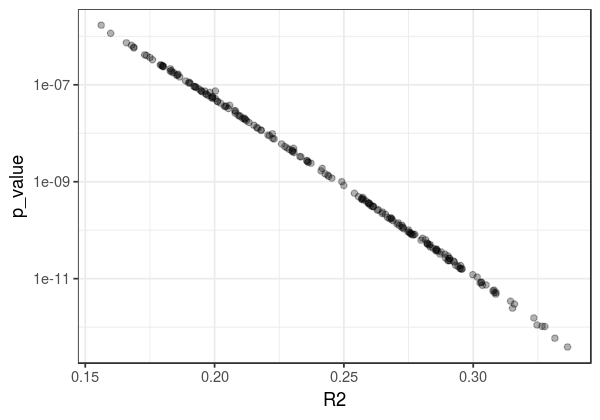

In [37]:
# p-value distribution
p = ggplot(pgls_res, aes(R2, p_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=3.5)
plot(p)

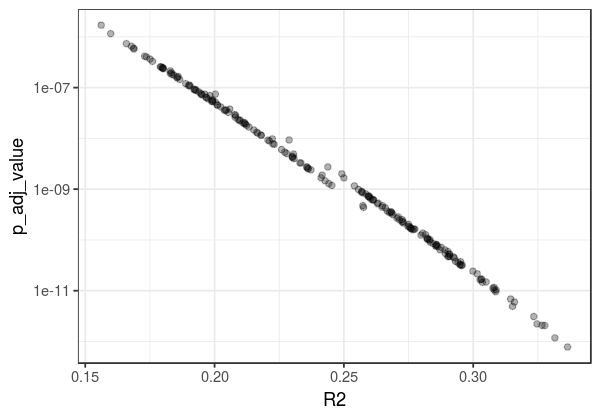

In [38]:
# p-adj-value distribution
p = ggplot(pgls_res, aes(R2, p_adj_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=3.5)
plot(p)

#### Significant indices

In [39]:
pgls_res_sig = pgls_res %>%
    group_by(y) %>%
    summarize(
        qvalue = (length(p_adj_value) - sum(p_adj_value < 0.05)) / length(p_adj_value)
        ) %>%
    ungroup() %>%
    filter(qvalue < 0.05)

pgls_res_sig %>% dfhead

[1] 2 2


y,qvalue
faith_pd,0
shannon,0


In [40]:
# getting all stats 
pgls_res_sig = pgls_res %>%
    semi_join(pgls_res_sig, c('y'))

pgls_res_sig %>% dfhead

[1] 200   9


Estimate,std_err,t_value,p_value,R2,x,y,rep,p_adj_value
17.662342,2.4044340,7.345738,2.317457e-11,0.2923305,diet,faith_pd,1,4.634915e-11
2.480857,0.4152268,5.974703,2.235768e-08,0.2096977,diet,shannon,1,2.235768e-08
17.264489,2.4800522,6.961341,1.690363e-10,0.2684861,diet,faith_pd,2,3.380727e-10


#### Plotting

File written: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT/PGLS/.figures/pgls_IndD_alpha-div_p-val-R2_v1.pdf 


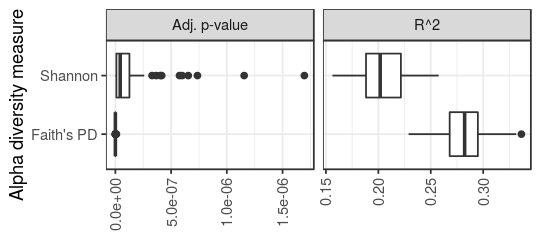

In [58]:
# adj-p-value & R2 dist
p = pgls_res_sig %>%
    dplyr::select(p_adj_value, R2, y) %>%
    gather(category, value, -y) %>%
    mutate(category = ifelse(category == 'R2', 'R^2', 'Adj. p-value'),
           y = ifelse(y == 'shannon', 'Shannon', 'Faith\'s PD')) %>%
    ggplot(aes(y, value)) +
    geom_boxplot() +
    labs(x='Alpha diversity measure') +
    facet_grid(. ~ category, scales='free_x') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )
    
options(repr.plot.width=4.5, repr.plot.height=2)
plot_write(p, file='pgls_IndD_alpha-div_p-val-R2_v1.pdf')

File written: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/phylosignal/host_TT/PGLS/.figures/pgls_IndD_alpha-div_p-val-R2_v2.pdf 


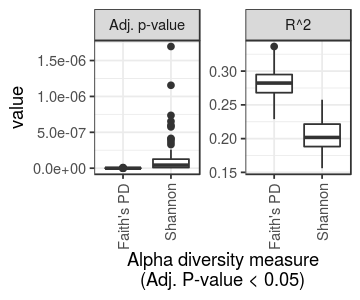

In [54]:
# adj-p-value & R2 dist
p = pgls_res_sig %>%
    dplyr::select(p_adj_value, R2, y) %>%
    gather(category, value, -y) %>%
    mutate(category = ifelse(category == 'R2', 'R^2', 'Adj. p-value'),
           y = ifelse(y == 'shannon', 'Shannon', 'Faith\'s PD')) %>%
    ggplot(aes(y, value)) +
    geom_boxplot() +
    labs(x='Alpha diversity measure\n(Adj. P-value < 0.05)', 
         y='value') +
    facet_wrap(. ~ category, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )
    
options(repr.plot.width=3, repr.plot.height=2.5)
plot_write(p, file='pgls_IndD_alpha-div_p-val-R2_v2.pdf')

### Diet compenents

In [63]:
#-- debug --#
y = c('faith_pd', 'shannon')

rep = 1
ret = pgls_each_tree(rep,
                     y = y,
                     x = 'diet_vertebrate + diet_invertebrate + diet_fruit + diet_flowers_nectar_pollen + diet_leaves_branches_bark_buds + diet_seeds + diet_grass_waterplants + diet_roots_tubers',
                     tree_list = host_tree_l,
                     data = alpha_div_j)

ret = do.call(rbind, ret) %>%
    as.data.frame
colnames(ret) = y

ret 

,faith_pd,shannon
Estimate,-3.63088744474186,-0.54518031769982
std_err,2.15756612591882,0.375173537724104
t_value,-1.68286264839073,-1.4531417141172
p_value,0.0950236292051736,0.148816392678482
R2,0.203129868360576,0.128216267791216
x,diet_vertebrate + diet_invertebrate + diet_fruit + diet_flowers_nectar_pollen + diet_leaves_branches_bark_buds + diet_seeds + diet_grass_waterplants + diet_roots_tubers,diet_vertebrate + diet_invertebrate + diet_fruit + diet_flowers_nectar_pollen + diet_leaves_branches_bark_buds + diet_seeds + diet_grass_waterplants + diet_roots_tubers
y,faith_pd,shannon
rep,1,1


In [ ]:
# running on each alpha-div index, each permuted tree
y = c('faith_pd', 'shannon')
doParallel::registerDoParallel(threads)
ret = plyr::llply(1:length(host_tree_l),
                  pgls_each_tree,
                  y = y,
                  x = 'diet_vertebrate + diet_invertebrate + diet_fruit + diet_flowers_nectar_pollen + diet_leaves_branches_bark_buds + diet_seeds + diet_grass_waterplants + diet_roots_tubers',
                  tree_list = host_tree_l,
                  data = alpha_div_j,
                  .parallel=TRUE)

ret = do.call(rbind, ret) %>%
    as.data.frame
rownames(ret) = 1:nrow(ret)

# status
ret %>% dfhead

In [ ]:
# formatting results
pgls_res = ret %>%
    mutate(R2 = R2 %>% as.numeric,
           p_value = p_value %>% as.numeric)

pgls_res %>% dfhead

#### p-adjust

In [ ]:
# adjusting per subsample rep
pgls_res = pgls_res %>%
    group_by(rep) %>%
    mutate(p_adj_value = p.adjust(p_value, method='BH')) %>%
    ungroup()
pgls_res %>% dfhead

#### Plotting

In [ ]:
pgls_res %>% summary

In [ ]:
# p-value distribution
p = ggplot(pgls_res, aes(R2, p_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=3.5)
plot(p)

In [ ]:
# p-adj-value distribution
p = ggplot(pgls_res, aes(R2, p_adj_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=3.5)
plot(p)

#### Significant indices

In [ ]:
# significant in most subsamples?
pgls_res_sig = pgls_res %>%
    group_by(y) %>%
    summarize(
        qvalue = (length(p_adj_value) - sum(p_adj_value < 0.05)) / length(p_adj_value)
        ) %>%
    ungroup() %>%
    filter(qvalue < 0.05)

pgls_res_sig %>% dfhead

In [ ]:
# almost significant?
pgls_res %>%
    group_by(y) %>%
    summarize(
        qvalue = (length(p_value) - sum(p_value < 0.05)) / length(p_value)
        ) %>%
    ungroup() 

# sessionInfo

In [62]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.1 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq_phylo/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq_phylo/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] bindrcpp_0.2.2  caper_1.0.1     mvtnorm_1.0-6   MASS_7.3-50    
 [5] ade4_1.7-11     phyloseq_1.22.3 ape_5.1         ggplot2_3.0.0  
 [9] tidyr_0.8.1     dplyr_0.7.6    

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17        lattice_0.20-34     Biostrings_2.46.0  
 [4] assertthat_0.2.0    digest_0.6.15       foreach_1.4.4      
 [7] IRdisplay_0.4.4     R6_2.2.2            plyr_1.8.4         
[10] repr_0.15.0         stats4_3.4.1        evaluate_0.10.1    
[13] pillar_1.2.2        zlibbioc_1.24.0     rl